In [88]:
import pandas as pd
import numpy as np
import csv

In [89]:
rats=[20382,24101,21012,22295,20630,22098,23783,24116]
path="../data_gen/"
df = pd.DataFrame()

In [90]:
for i in range(len(rats)):
    ratid=rats[i]
    data=pd.read_json(path+"Rat_"+str(ratid)+"_resrel_data.json",orient="records")
    #print(data.columns)
    data['LOC']=data['LOC'].apply(lambda x: x[-1])
    
    data['PInfoR']=data['PInfo'].apply(lambda x: x['rate'])
    data['HInfoR']=data['HInfo'].apply(lambda x: x['rate'])
    
    data['PInfoC']=data['PInfo'].apply(lambda x: x['content'])
    data['HInfoC']=data['HInfo'].apply(lambda x: x['content'])

    data['poss_PInfoR']=data['poss_PInfo'].apply(lambda x: x['rate'])
    data['poss_HInfoR']=data['poss_HInfo'].apply(lambda x: x['rate'])
    
    data['poss_PInfoC']=data['poss_PInfo'].apply(lambda x: x['content'])
    data['poss_HInfoC']=data['poss_HInfo'].apply(lambda x: x['content'])

    # Grouping and calculating mean or sum for specified columns based on group size
    grouped_df = data.groupby('NeuID')
    columns_to_mean = ['Nspikes', 'MSR', 'MHK','dt_MHK', 'OHK', 'OHS', 'dt_OHK', 'max_HSHK', 'PInfoR', 'HInfoR', 'PInfoC', 'HInfoC','poss_MSR', 'poss_MHK', 'poss_dt_MHK', 'poss_OHK', 'poss_OHS','poss_dt_OHK', 'poss_max_HSHK', 'poss_PInfoR', 'poss_HInfoR','poss_PInfoC', 'poss_HInfoC']
    
    tmp_df = pd.DataFrame()
    for name, group in grouped_df:
        if len(group) > 1:
            result_values = group[columns_to_mean].mean()
        else:
            result_values = group[columns_to_mean].sum()
        tmp_df = pd.concat([tmp_df, result_values.to_frame(name=name).T])
    tmp_df['RatID'] = tmp_df.index.map(data.drop_duplicates('NeuID').set_index('NeuID')['RAT_ID'])
    tmp_df['LOC'] = tmp_df.index.map(data.drop_duplicates('NeuID').set_index('NeuID')['LOC'])
    tmp_df['task'] = tmp_df.index.map(data.drop_duplicates('NeuID').set_index('NeuID')['task'])
    columns = tmp_df.columns.tolist()
    tmp_df=tmp_df[ columns[-3:] + columns[:-3]]
    tmp_df.reset_index(inplace=True)
    tmp_df.rename(columns={'index': 'NeuID'}, inplace=True)
    #print(df.columns)
    df = pd.concat([df,tmp_df], ignore_index=True)


In [91]:
df.columns

Index(['NeuID', 'RatID', 'LOC', 'task', 'Nspikes', 'MSR', 'MHK', 'dt_MHK',
       'OHK', 'OHS', 'dt_OHK', 'max_HSHK', 'PInfoR', 'HInfoR', 'PInfoC',
       'HInfoC', 'poss_MSR', 'poss_MHK', 'poss_dt_MHK', 'poss_OHK', 'poss_OHS',
       'poss_dt_OHK', 'poss_max_HSHK', 'poss_PInfoR', 'poss_HInfoR',
       'poss_PInfoC', 'poss_HInfoC'],
      dtype='object')

In [92]:
from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
mpl.rcParams.update(mpl.rcParamsDefault)

In [93]:
from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import gridspec
mpl.rcParams.update(mpl.rcParamsDefault)

In [94]:
mss=120
fontssize=50
mpl.rcParams.update({
    'figure.figsize': (23.6,12.6),
    'font.family': 'serif',
    'font.serif': ['Liberation Sans'],  # Add or remove font names as needed
    #'font.sans-serif':['Helvetica'],
    'font.size': fontssize,  # Adjust as needed
    #'font.weight': 'bold',
    "svg.fonttype": 'none',
    'text.usetex': False,
    'axes.linewidth' : 2,
    #'axes.labelweight': 'bold',
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amsfonts} \usepackage{cmbright}',
    'xtick.labelsize' : fontssize, # fontsize of the x tick labels
    'ytick.labelsize' : fontssize, # fontsize of the y tick labels
})
ticks_font = font_manager.FontProperties(family='Liberation Sans', style='normal',
    size=fontssize, weight='bold', stretch='normal')


In [95]:
# mpl.rcParams.keys() 
plt.clf()

## MSR

In [96]:
# # Create scatter plot
# fig, ax = plt.subplots(figsize=(20,12))

# quantX='MSR'
# quantX_lab=r'MSR (bits$^2$)'

# quantY='PInfoC'
# quantY_lab='Pos. info. content (bits/spike)'

# figname='../figures/PosvMSR.pdf'
# #figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2C.png'



# # Scatter plot for 'quant' data
# ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
# ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
# # Scatter plot for 'poss_MSR' data
# ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
# ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# # Create Marginal plot on the right-hand side
# divider = make_axes_locatable(ax)
# # Plot histogram on the right (for both sets of data)
# ax_histy = divider.append_axes("right", 2.5, pad=0.05, sharey=ax)  # Adjusted pad value
# # Remove y-axis label on the Marginal plot
# ax_histy.tick_params(axis="y", labelleft=False)

# # Plot histogram for 'quant' data
# bins = 25
# c1,b1=np.histogram(df.query('LOC=="CA1"')[quantY], bins=bins)
# ax_histy.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='horizontal',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
# c2,b2=np.histogram(df.query('LOC=="SUB"')[quantY], bins=bins)
# ax_histy.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='horizontal',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')


# # Plot histogram for 'poss_quant' data
# c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
# c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')



# # Set labels and title for the main scatter plot
# ax.set_xlabel(quantX_lab)
# ax.set_ylabel(quantY_lab)  # Adjusted Y-axis label
# ax.set_xlim(0.21,0.31)
# ax.tick_params(axis="x", labelrotation=90)
# # ax.set_yscale('log')
# ax.set_ylim(0, 8)


# for tick in ax.get_xticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax.get_yticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax_histy.get_xticklabels():
#     tick.set_fontproperties(ticks_font)


# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# # ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.18), ncol=2,fontsize=22)

# # fig.tight_layout()
# # fig.savefig(figname,bbox_inches='tight',dpi=300)
# # plt.savefig(figname2,dpi=300)
# plt.show(fig)

/tmp/ipykernel_18302/3690216514.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 2360x1260 with 0 Axes>

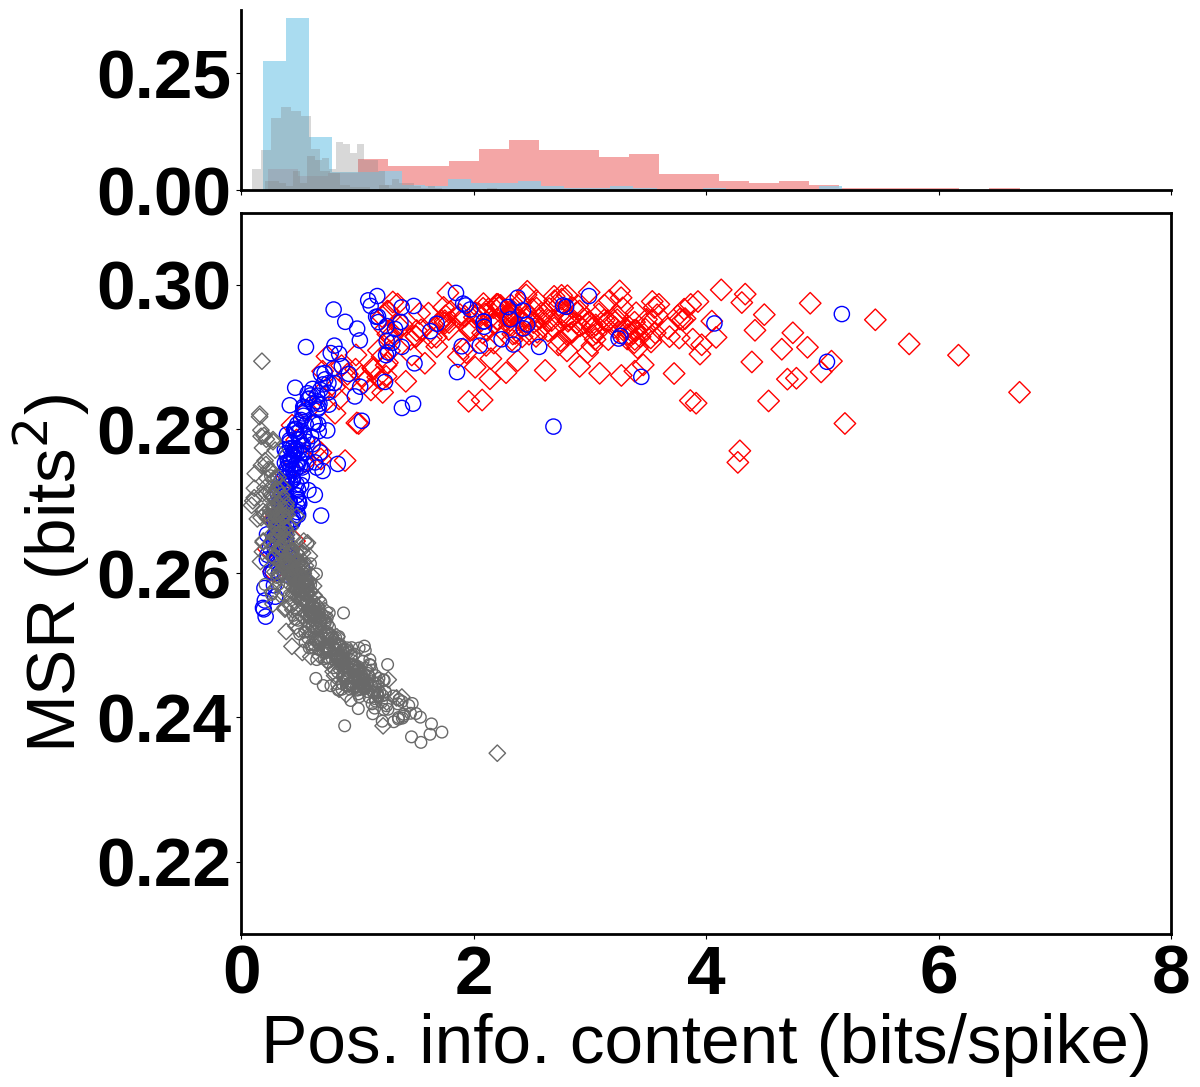

In [97]:
plt.clf()

quantY='MSR'
quantY_lab=r'MSR (bits$^2$)'

quantX='PInfoC'
quantX_lab='Pos. info. content (bits/spike)'

figname='../figures/Afig1C.pdf'

# Create figure with gridspec
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], figure=fig, hspace=0.05)

ax_histx = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Scatter plot with swapped axes (Y becomes X, X becomes Y)
ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# Set labels for swapped axes
ax.set_xlabel(quantX_lab)
ax.set_ylabel(quantY_lab)
ax.set_xlim(0, 8)
ax.set_ylim(0.21, 0.31)
# ax.tick_params(axis="x", labelrotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# Vertical histogram on top - frameless with only bottom and left spines
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)

bins = 25
c1,b1=np.histogram(df.query('LOC=="CA1"')[quantX], bins=bins)
ax_histx.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='vertical',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
c2,b2=np.histogram(df.query('LOC=="SUB"')[quantX], bins=bins)
ax_histx.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='vertical',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')

c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantX], bins=bins)
ax_histx.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantX], bins=bins)
ax_histx.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')

ax_histx.set_xlim(0, 8)

for tick in ax_histx.get_yticklabels():
    tick.set_fontproperties(ticks_font)

fig.tight_layout()
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show(fig)

/tmp/ipykernel_18302/2828519768.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 2360x1260 with 0 Axes>

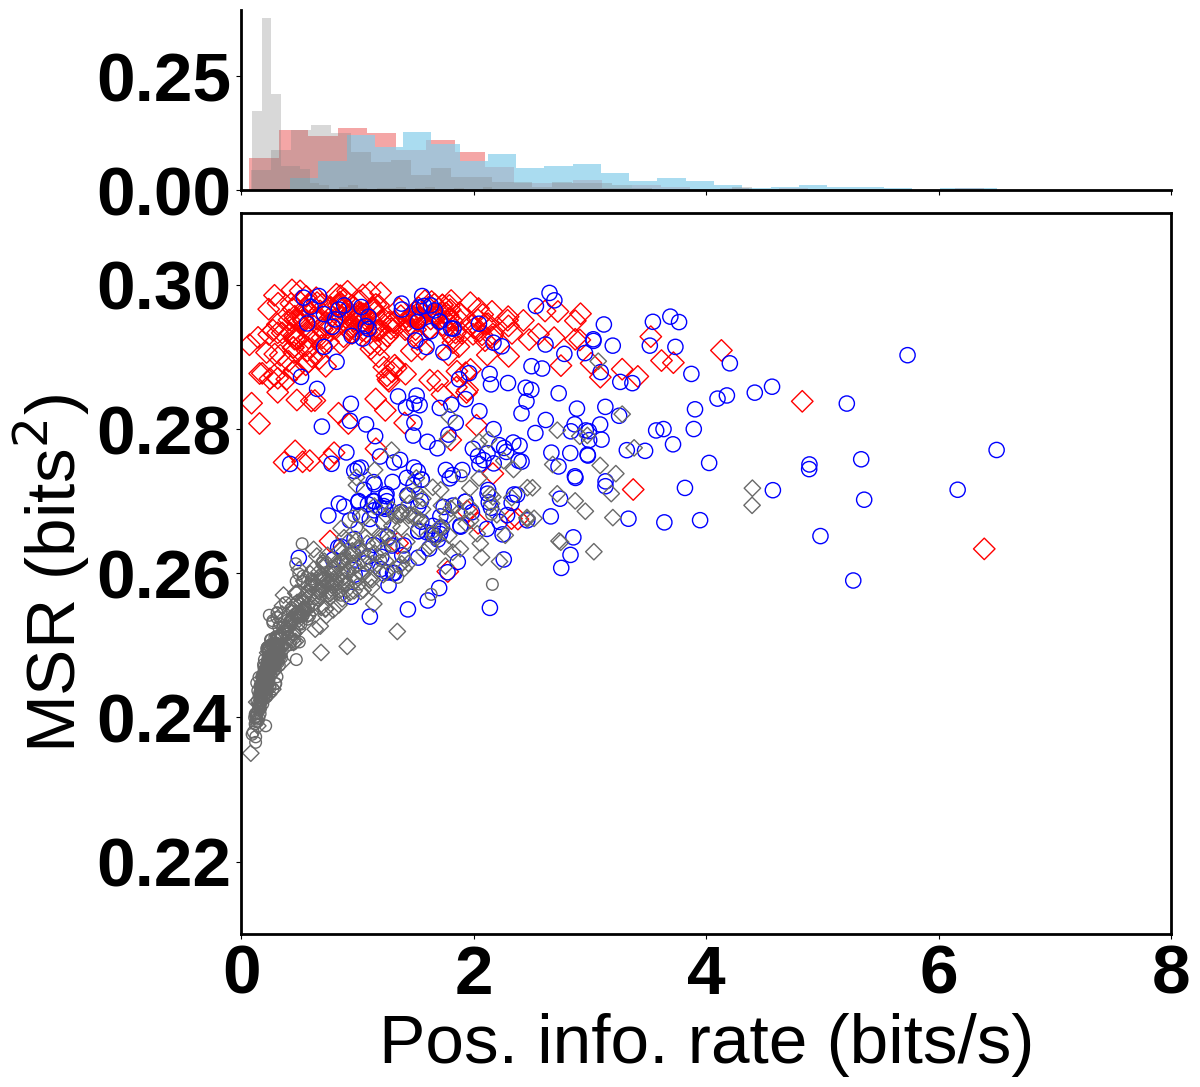

In [98]:
plt.clf()

quantY='MSR'
quantY_lab=r'MSR (bits$^2$)'

quantX='PInfoR'
quantX_lab='Pos. info. rate (bits/s)'

figname='../figures/Afig1A.pdf'

# Create figure with gridspec
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], figure=fig, hspace=0.05)

ax_histx = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Scatter plot with swapped axes (Y becomes X, X becomes Y)
ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# Set labels for swapped axes
ax.set_xlabel(quantX_lab)
ax.set_ylabel(quantY_lab)
ax.set_xlim(0, 8)
ax.set_ylim(0.21, 0.31)
# ax.tick_params(axis="x", labelrotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# Vertical histogram on top - frameless with only bottom and left spines
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)

bins = 25
c1,b1=np.histogram(df.query('LOC=="CA1"')[quantX], bins=bins)
ax_histx.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='vertical',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
c2,b2=np.histogram(df.query('LOC=="SUB"')[quantX], bins=bins)
ax_histx.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='vertical',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')

c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantX], bins=bins)
ax_histx.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantX], bins=bins)
ax_histx.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')

ax_histx.set_xlim(0, 8)

for tick in ax_histx.get_yticklabels():
    tick.set_fontproperties(ticks_font)

fig.tight_layout()
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show(fig)

In [99]:
# filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-4]+'.csv'

# with open(filepath_plotdata, 'w', newline='') as csvfile:
#     fieldnames = [quantX+'_CA1', quantY+'_CA1',quantX+'_SUB',quantY+'_SUB',quantX+'_posCA1',quantY+'_posCA1',quantX+'_posSUB',quantY+'_posSUB']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(
#         {
#             quantX+'_CA1': x[0], quantY+'_CA1': x[1],quantX+'_SUB': y[0],quantY+'_SUB': y[1],quantX+'_posCA1': z[0],quantY+'_posCA1': z[1],quantX+'_posSUB': w[0],quantY+'_posSUB': w[1]
#         } for x,y,z,w in zip(
#             df.query('LOC=="CA1"')[[quantX,quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,quantY]].values,
#             df.query('LOC=="CA1"')[[quantX,'poss_'+quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,'poss_'+quantY]].values
#             )
#     )

In [100]:
# filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-4]+'.csv'

# with open(filepath_plotdata, 'w', newline='') as csvfile:
#     fieldnames = [quantX+'_CA1', quantY+'_CA1',quantX+'_SUB',quantY+'_SUB',quantX+'_posCA1',quantY+'_posCA1',quantX+'_posSUB',quantY+'_posSUB']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(
#         {
#             quantX+'_CA1': x[0], quantY+'_CA1': x[1],quantX+'_SUB': y[0],quantY+'_SUB': y[1],quantX+'_posCA1': z[0],quantY+'_posCA1': z[1],quantX+'_posSUB': w[0],quantY+'_posSUB': w[1]
#         } for x,y,z,w in zip(
#             df.query('LOC=="CA1"')[[quantX,quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,quantY]].values,
#             df.query('LOC=="CA1"')[[quantX,'poss_'+quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,'poss_'+quantY]].values
#             )
#     )

### HD Info

In [101]:
# # Create scatter plot
# fig, ax = plt.subplots(figsize=(20,12))

# quantX='MSR'
# quantX_lab=r'MSR (bits$^2$)'

# quantY='HInfoR'
# quantY_lab='HD. info. rate (bits/s)'

# figname='../figures/HDvMSR.pdf'
# #figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2C.png'



# # Scatter plot for 'quant' data
# ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
# ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
# # Scatter plot for 'poss_MSR' data
# ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
# ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# # Create Marginal plot on the right-hand side
# divider = make_axes_locatable(ax)
# # Plot histogram on the right (for both sets of data)
# ax_histy = divider.append_axes("right", 2.5, pad=0.05, sharey=ax)  # Adjusted pad value
# # Remove y-axis label on the Marginal plot
# ax_histy.tick_params(axis="y", labelleft=False)

# # Plot histogram for 'quant' data
# bins = 25
# c1,b1=np.histogram(df.query('LOC=="CA1"')[quantY], bins=bins)
# ax_histy.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='horizontal',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
# c2,b2=np.histogram(df.query('LOC=="SUB"')[quantY], bins=bins)
# ax_histy.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='horizontal',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')


# # Plot histogram for 'poss_quant' data
# c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
# c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')



# # Set labels and title for the main scatter plot
# ax.set_xlabel(quantX_lab)
# ax.set_ylabel(quantY_lab)  # Adjusted Y-axis label
# ax.set_xlim(0.21,0.31)
# # ax.set_yscale('log')
# ax.set_ylim(0, 2.5)
# ax.tick_params(axis="x", labelrotation=90)


# for tick in ax.get_xticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax.get_yticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax_histy.get_xticklabels():
#     tick.set_fontproperties(ticks_font)


# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# # ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.18), ncol=2,fontsize=22)

# # fig.tight_layout()
# # fig.savefig(figname,bbox_inches='tight',dpi=300)
# # plt.savefig(figname2,dpi=300)
# plt.show(fig)

/tmp/ipykernel_18302/1763267133.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 2360x1260 with 0 Axes>

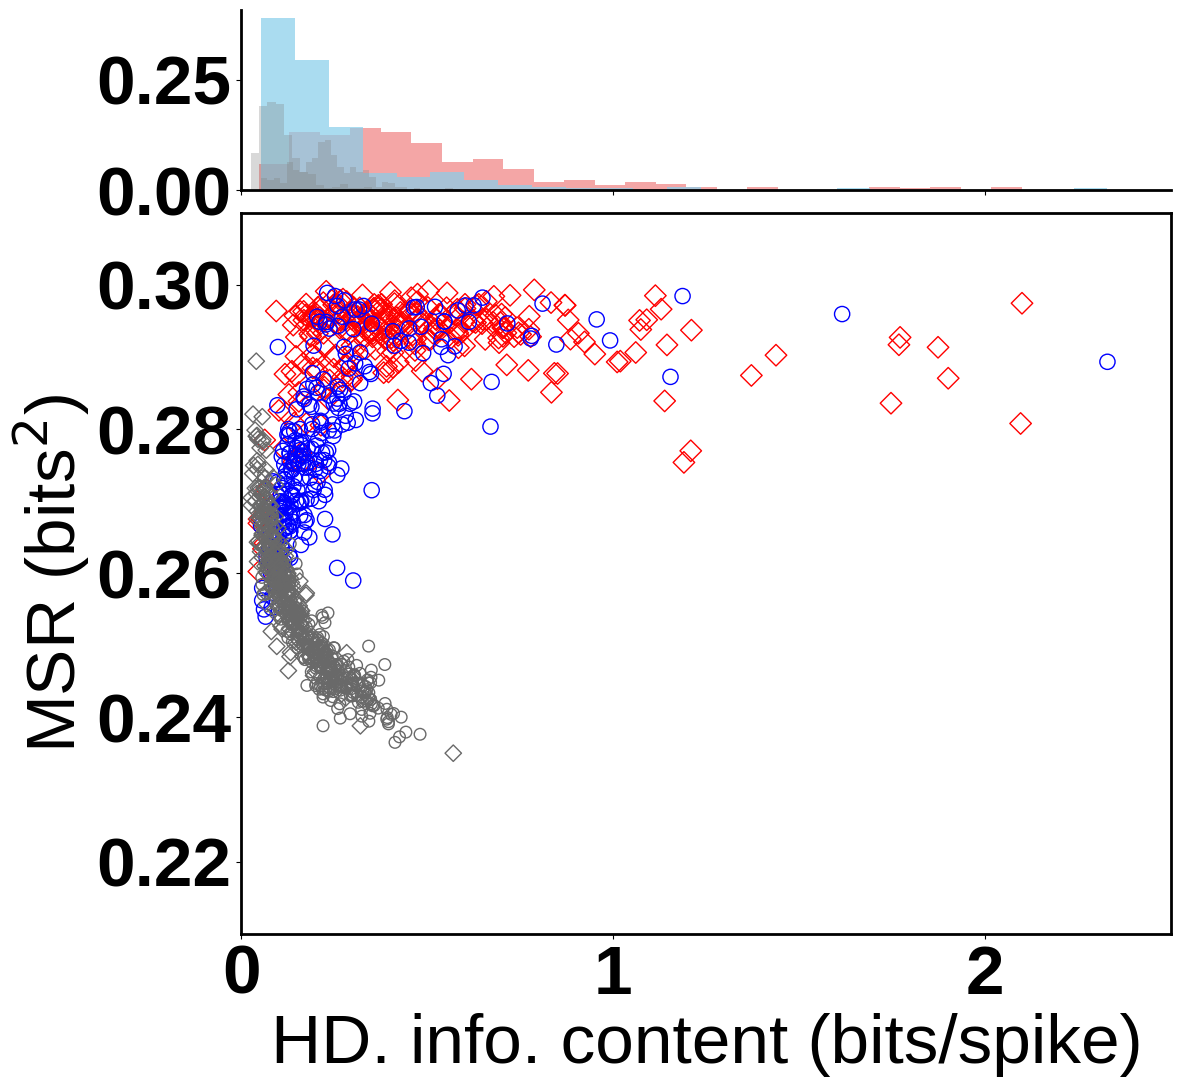

In [102]:

plt.clf()

quantY='MSR'
quantY_lab=r'MSR (bits$^2$)'

quantX='HInfoC'
quantX_lab='HD. info. content (bits/spike)'

figname='../figures/Afig1D.pdf'

# Create figure with gridspec
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], figure=fig, hspace=0.05)

ax_histx = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Scatter plot with swapped axes (Y becomes X, X becomes Y)
ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# Set labels for swapped axes
ax.set_xlabel(quantX_lab)
ax.set_ylabel(quantY_lab)
ax.set_xlim(0, 2.5)
ax.set_ylim(0.21, 0.31)
# ax.tick_params(axis="x", labelrotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# Vertical histogram on top - frameless with only bottom and left spines
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)

bins = 25
c1,b1=np.histogram(df.query('LOC=="CA1"')[quantX], bins=bins)
ax_histx.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='vertical',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
c2,b2=np.histogram(df.query('LOC=="SUB"')[quantX], bins=bins)
ax_histx.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='vertical',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')

c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantX], bins=bins)
ax_histx.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantX], bins=bins)
ax_histx.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')

ax_histx.set_xlim(0, 2.5)

for tick in ax_histx.get_yticklabels():
    tick.set_fontproperties(ticks_font)

fig.tight_layout()
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show(fig)

/tmp/ipykernel_18302/2632770445.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 2360x1260 with 0 Axes>

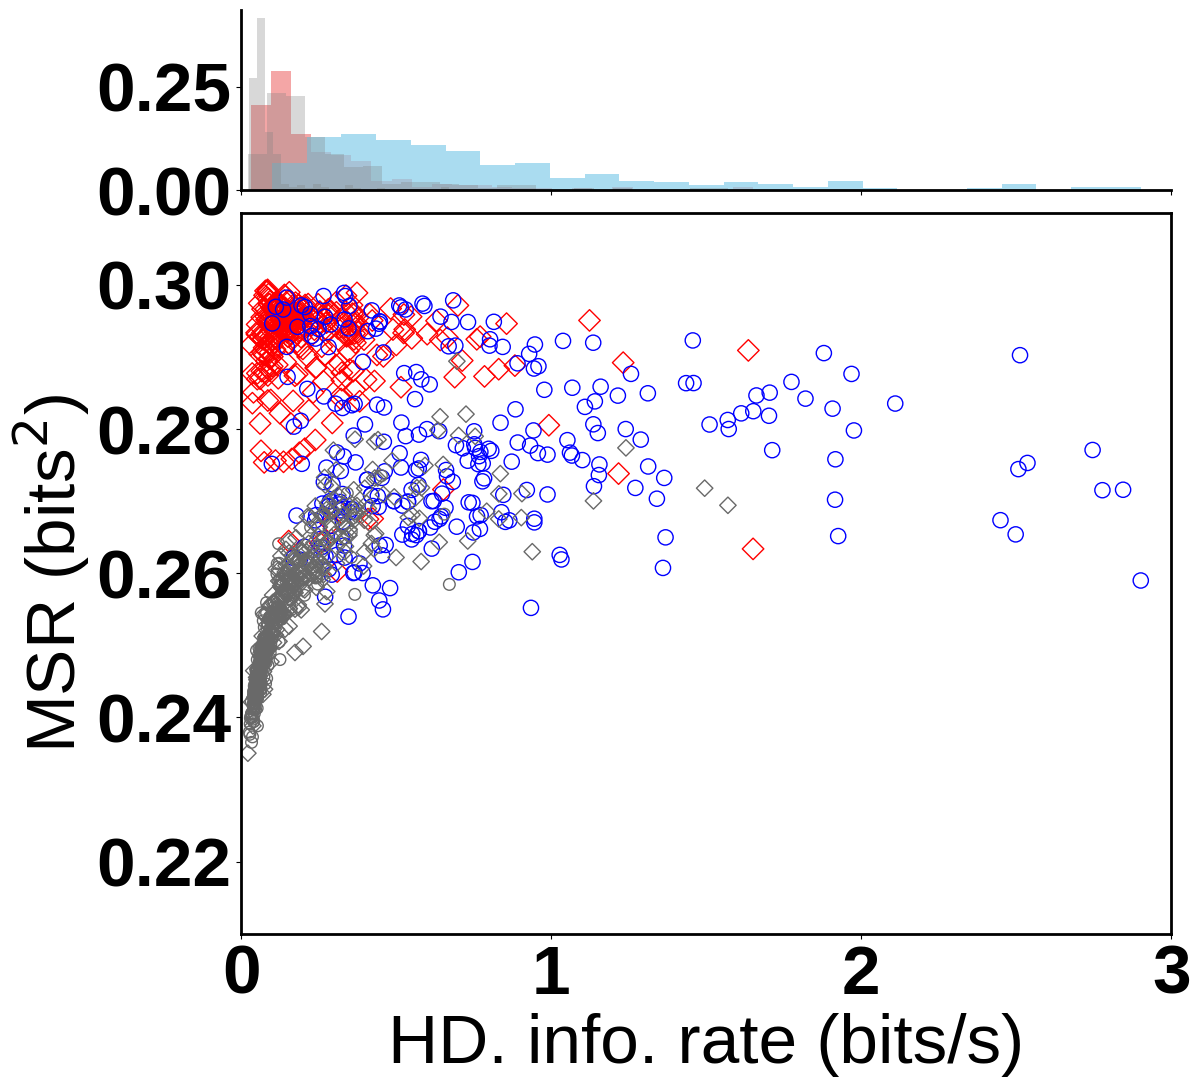

In [103]:
plt.clf()

quantY='MSR'
quantY_lab=r'MSR (bits$^2$)'

quantX='HInfoR'
quantX_lab='HD. info. rate (bits/s)'

figname='../figures/Afig1B.pdf'

# Create figure with gridspec
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], figure=fig, hspace=0.05)

ax_histx = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Scatter plot with swapped axes (Y becomes X, X becomes Y)
ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# Set labels for swapped axes
ax.set_xlabel(quantX_lab)
ax.set_ylabel(quantY_lab)
ax.set_xlim(0, 3)
ax.set_ylim(0.21, 0.31)
# ax.tick_params(axis="x", labelrotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# Vertical histogram on top - frameless with only bottom and left spines
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)

bins = 25
c1,b1=np.histogram(df.query('LOC=="CA1"')[quantX], bins=bins)
ax_histx.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='vertical',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
c2,b2=np.histogram(df.query('LOC=="SUB"')[quantX], bins=bins)
ax_histx.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='vertical',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')

c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantX], bins=bins)
ax_histx.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantX], bins=bins)
ax_histx.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')

ax_histx.set_xlim(0, 3)

for tick in ax_histx.get_yticklabels():
    tick.set_fontproperties(ticks_font)

fig.tight_layout()
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show(fig)

In [104]:
# filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-4]+'.csv'

# with open(filepath_plotdata, 'w', newline='') as csvfile:
#     fieldnames = [quantX+'_CA1', quantY+'_CA1',quantX+'_SUB',quantY+'_SUB',quantX+'_posCA1',quantY+'_posCA1',quantX+'_posSUB',quantY+'_posSUB']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(
#         {
#             quantX+'_CA1': x[0], quantY+'_CA1': x[1],quantX+'_SUB': y[0],quantY+'_SUB': y[1],quantX+'_posCA1': z[0],quantY+'_posCA1': z[1],quantX+'_posSUB': w[0],quantY+'_posSUB': w[1]
#         } for x,y,z,w in zip(
#             df.query('LOC=="CA1"')[[quantX,quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,quantY]].values,
#             df.query('LOC=="CA1"')[[quantX,'poss_'+quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,'poss_'+quantY]].values
#             )
#     )

## OHK

In [105]:
# # Create scatter plot
# fig, ax = plt.subplots(figsize=(20,12))

# quantX='OHK'
# quantX_lab=r'$H^{(-1)}[k]$ (bits)'

# quantY='HInfo'
# quantY_lab='HD. info. content (bits/spike)'

# figname='../figures/HDvOHK.pdf'
# #figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2C.png'



# # Scatter plot for 'quant' data
# ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
# ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
# # Scatter plot for 'poss_MSR' data
# ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
# ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# # Create Marginal plot on the right-hand side
# divider = make_axes_locatable(ax)
# # Plot histogram on the right (for both sets of data)
# ax_histy = divider.append_axes("right", 2.5, pad=0.05, sharey=ax)  # Adjusted pad value
# # Remove y-axis label on the Marginal plot
# ax_histy.tick_params(axis="y", labelleft=False)

# # Plot histogram for 'quant' data
# bins = 25
# c1,b1=np.histogram(df.query('LOC=="CA1"')[quantY], bins=bins)
# ax_histy.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='horizontal',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
# c2,b2=np.histogram(df.query('LOC=="SUB"')[quantY], bins=bins)
# ax_histy.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='horizontal',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')


# # Plot histogram for 'poss_quant' data
# c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
# c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')


# # Set labels and title for the main scatter plot
# ax.set_xlabel(quantX_lab)
# ax.set_ylabel(quantY_lab)  # Adjusted Y-axis label
# ax.set_xlim(0.09,0.55)
# # ax.set_yscale('log')
# ax.set_ylim(0, 2.5)
# ax.tick_params(axis="x", labelrotation=90)


# for tick in ax.get_xticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax.get_yticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax_histy.get_xticklabels():
#     tick.set_fontproperties(ticks_font)


# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# # ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.18), ncol=2,fontsize=22)

# # fig.tight_layout()
# # fig.savefig(figname,bbox_inches='tight',dpi=300)
# # plt.savefig(figname2,dpi=300)
# plt.show(fig)

/tmp/ipykernel_18302/892880498.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 2360x1260 with 0 Axes>

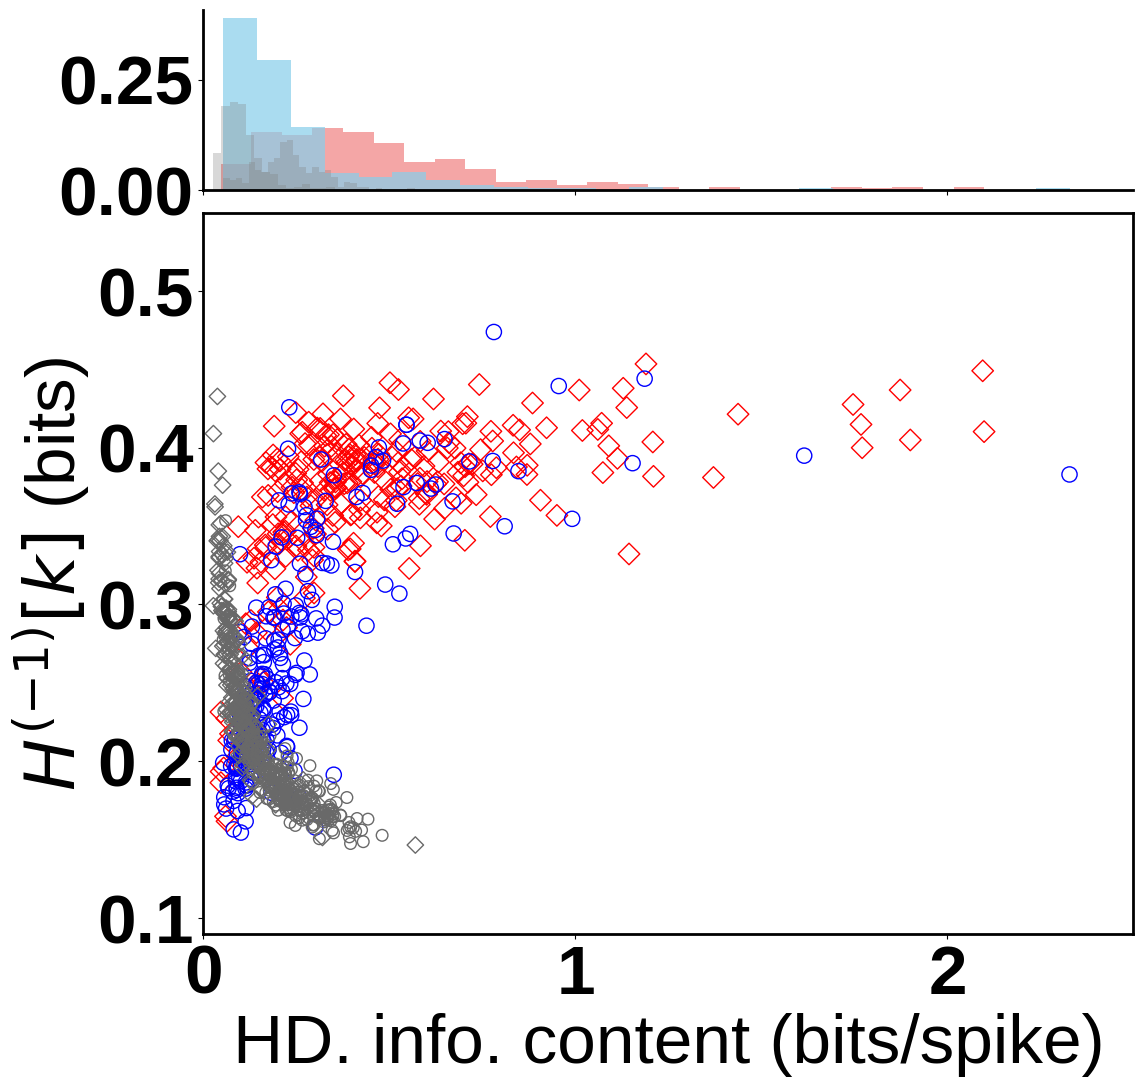

In [106]:

plt.clf()

quantY='OHK'
quantY_lab=r'$H^{(-1)}[k]$ (bits)'

quantX='HInfoC'
quantX_lab='HD. info. content (bits/spike)'

figname='../figures/Afig2D.pdf'

# Create figure with gridspec
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], figure=fig, hspace=0.05)

ax_histx = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Scatter plot with swapped axes (Y becomes X, X becomes Y)
ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# Set labels for swapped axes
ax.set_xlabel(quantX_lab)
ax.set_ylabel(quantY_lab)
ax.set_xlim(0, 2.5)
ax.set_ylim(0.09, 0.55)
# ax.tick_params(axis="x", labelrotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# Vertical histogram on top - frameless with only bottom and left spines
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)

bins = 25
c1,b1=np.histogram(df.query('LOC=="CA1"')[quantX], bins=bins)
ax_histx.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='vertical',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
c2,b2=np.histogram(df.query('LOC=="SUB"')[quantX], bins=bins)
ax_histx.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='vertical',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')

c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantX], bins=bins)
ax_histx.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantX], bins=bins)
ax_histx.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')

ax_histx.set_xlim(0, 2.5)

for tick in ax_histx.get_yticklabels():
    tick.set_fontproperties(ticks_font)

fig.tight_layout()
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show(fig)

/tmp/ipykernel_18302/1152182836.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 2360x1260 with 0 Axes>

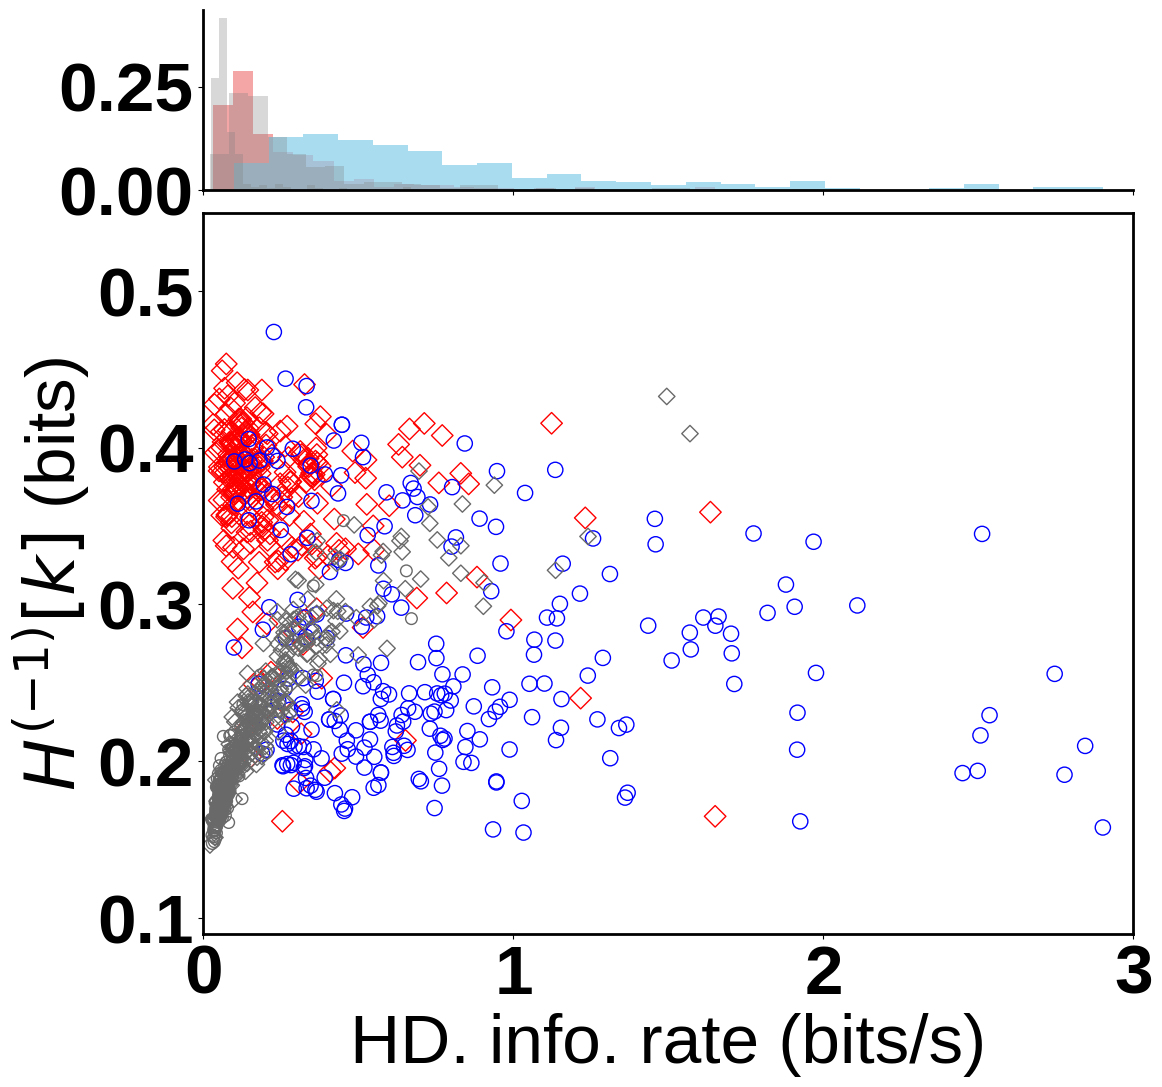

In [107]:

plt.clf()

quantY='OHK'
quantY_lab=r'$H^{(-1)}[k]$ (bits)'

quantX='HInfoR'
quantX_lab='HD. info. rate (bits/s)'

figname='../figures/Afig2B.pdf'

# Create figure with gridspec
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], figure=fig, hspace=0.05)

ax_histx = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Scatter plot with swapped axes (Y becomes X, X becomes Y)
ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# Set labels for swapped axes
ax.set_xlabel(quantX_lab)
ax.set_ylabel(quantY_lab)
ax.set_xlim(0, 3)
ax.set_ylim(0.09, 0.55)
# ax.tick_params(axis="x", labelrotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# Vertical histogram on top - frameless with only bottom and left spines
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)

bins = 25
c1,b1=np.histogram(df.query('LOC=="CA1"')[quantX], bins=bins)
ax_histx.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='vertical',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
c2,b2=np.histogram(df.query('LOC=="SUB"')[quantX], bins=bins)
ax_histx.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='vertical',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')

c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantX], bins=bins)
ax_histx.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantX], bins=bins)
ax_histx.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')

ax_histx.set_xlim(0, 3)

for tick in ax_histx.get_yticklabels():
    tick.set_fontproperties(ticks_font)

fig.tight_layout()
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show(fig)

In [108]:
# filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-4]+'.csv'

# with open(filepath_plotdata, 'w', newline='') as csvfile:
#     fieldnames = [quantX+'_CA1', quantY+'_CA1',quantX+'_SUB',quantY+'_SUB',quantX+'_posCA1',quantY+'_posCA1',quantX+'_posSUB',quantY+'_posSUB']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(
#         {
#             quantX+'_CA1': x[0], quantY+'_CA1': x[1],quantX+'_SUB': y[0],quantY+'_SUB': y[1],quantX+'_posCA1': z[0],quantY+'_posCA1': z[1],quantX+'_posSUB': w[0],quantY+'_posSUB': w[1]
#         } for x,y,z,w in zip(
#             df.query('LOC=="CA1"')[[quantX,quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,quantY]].values,
#             df.query('LOC=="CA1"')[[quantX,'poss_'+quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,'poss_'+quantY]].values
#             )
#     )

In [109]:
# # Create scatter plot
# fig, ax = plt.subplots(figsize=(20,12))

# quantX='OHK'
# quantX_lab=r'$H^{(-1)}[k]$ (bits)'

# quantY='PInfo'
# quantY_lab='Pos. info. content (bits/spike)'

# figname='../figures/PosvOHK.pdf'
# #figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2C.png'



# # Scatter plot for 'quant' data
# ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
# ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
# # Scatter plot for 'poss_MSR' data
# ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
# ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# # Create Marginal plot on the right-hand side
# divider = make_axes_locatable(ax)
# # Plot histogram on the right (for both sets of data)
# ax_histy = divider.append_axes("right", 2.5, pad=0.05, sharey=ax)  # Adjusted pad value
# # Remove y-axis label on the Marginal plot
# ax_histy.tick_params(axis="y", labelleft=False)

# # Plot histogram for 'quant' data
# bins = 25
# c1,b1=np.histogram(df.query('LOC=="CA1"')[quantY], bins=bins)
# ax_histy.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='horizontal',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
# c2,b2=np.histogram(df.query('LOC=="SUB"')[quantY], bins=bins)
# ax_histy.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='horizontal',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')


# # Plot histogram for 'poss_quant' data
# c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
# c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')



# # Set labels and title for the main scatter plot
# ax.set_xlabel(quantX_lab)
# ax.set_ylabel(quantY_lab)  # Adjusted Y-axis label
# ax.set_xlim(0.09,0.55)
# # ax.set_yscale('log')
# ax.set_ylim(0, 8)
# ax.tick_params(axis="x", labelrotation=90)


# for tick in ax.get_xticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax.get_yticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax_histy.get_xticklabels():
#     tick.set_fontproperties(ticks_font)


# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# # ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.18), ncol=2,fontsize=22)

# # fig.tight_layout()
# # fig.savefig(figname,bbox_inches='tight',dpi=300)
# # plt.savefig(figname2,dpi=300)
# plt.show(fig)

### Pos

/tmp/ipykernel_18302/4294227824.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 2360x1260 with 0 Axes>

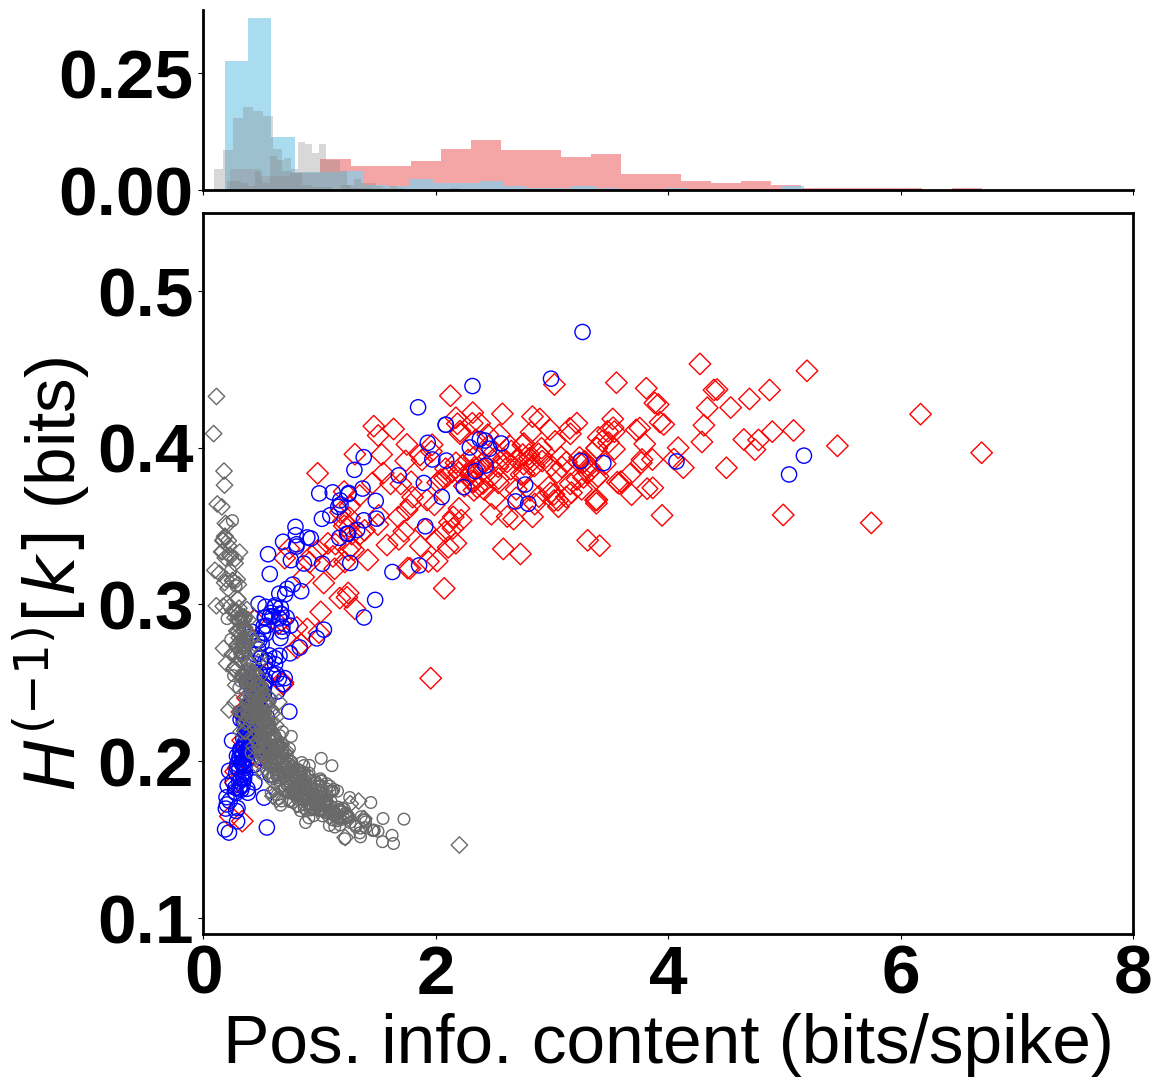

In [110]:

plt.clf()

quantY='OHK'
quantY_lab=r'$H^{(-1)}[k]$ (bits)'

quantX='PInfoC'
quantX_lab='Pos. info. content (bits/spike)'

figname='../figures/Afig2C.pdf'

# Create figure with gridspec
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], figure=fig, hspace=0.05)

ax_histx = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Scatter plot with swapped axes (Y becomes X, X becomes Y)
ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# Set labels for swapped axes
ax.set_xlabel(quantX_lab)
ax.set_ylabel(quantY_lab)
ax.set_xlim(0, 8)
ax.set_ylim(0.09,0.55)
# ax.tick_params(axis="x", labelrotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# Vertical histogram on top - frameless with only bottom and left spines
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)

bins = 25
c1,b1=np.histogram(df.query('LOC=="CA1"')[quantX], bins=bins)
ax_histx.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='vertical',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
c2,b2=np.histogram(df.query('LOC=="SUB"')[quantX], bins=bins)
ax_histx.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='vertical',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')

c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantX], bins=bins)
ax_histx.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantX], bins=bins)
ax_histx.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')

ax_histx.set_xlim(0, 8)

for tick in ax_histx.get_yticklabels():
    tick.set_fontproperties(ticks_font)

fig.tight_layout()
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show(fig)

/tmp/ipykernel_18302/1731091091.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 2360x1260 with 0 Axes>

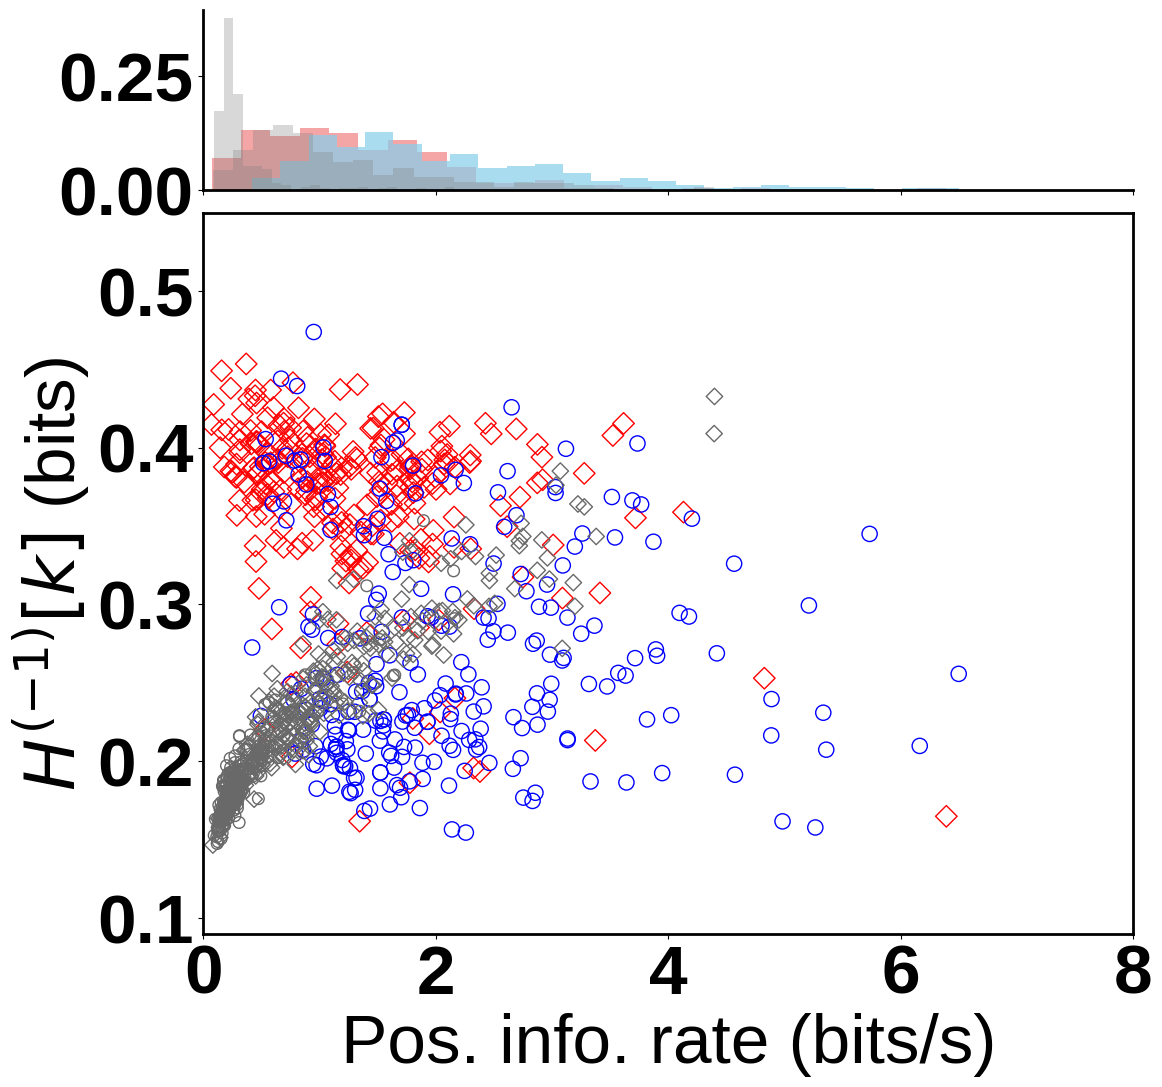

In [111]:

plt.clf()

quantY='OHK'
quantY_lab=r'$H^{(-1)}[k]$ (bits)'

quantX='PInfoR'
quantX_lab='Pos. info. rate (bits/s)'

figname='../figures/Afig2A.pdf'

# Create figure with gridspec
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], figure=fig, hspace=0.05)

ax_histx = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Scatter plot with swapped axes (Y becomes X, X becomes Y)
ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# Set labels for swapped axes
ax.set_xlabel(quantX_lab)
ax.set_ylabel(quantY_lab)
ax.set_xlim(0, 8)
ax.set_ylim(0.09,0.55)
# ax.tick_params(axis="x", labelrotation=90)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

# Vertical histogram on top - frameless with only bottom and left spines
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)

bins = 25
c1,b1=np.histogram(df.query('LOC=="CA1"')[quantX], bins=bins)
ax_histx.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='vertical',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
c2,b2=np.histogram(df.query('LOC=="SUB"')[quantX], bins=bins)
ax_histx.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='vertical',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')

c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantX], bins=bins)
ax_histx.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantX], bins=bins)
ax_histx.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='vertical',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')

ax_histx.set_xlim(0, 8)

for tick in ax_histx.get_yticklabels():
    tick.set_fontproperties(ticks_font)

fig.tight_layout()
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show(fig)

In [112]:
# filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-4]+'.csv'

# with open(filepath_plotdata, 'w', newline='') as csvfile:
#     fieldnames = [quantX+'_CA1', quantY+'_CA1',quantX+'_SUB',quantY+'_SUB',quantX+'_posCA1',quantY+'_posCA1',quantX+'_posSUB',quantY+'_posSUB']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(
#         {
#             quantX+'_CA1': x[0], quantY+'_CA1': x[1],quantX+'_SUB': y[0],quantY+'_SUB': y[1],quantX+'_posCA1': z[0],quantY+'_posCA1': z[1],quantX+'_posSUB': w[0],quantY+'_posSUB': w[1]
#         } for x,y,z,w in zip(
#             df.query('LOC=="CA1"')[[quantX,quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,quantY]].values,
#             df.query('LOC=="CA1"')[[quantX,'poss_'+quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,'poss_'+quantY]].values
#             )
#     )

### OHS

In [113]:
# # Create scatter plot
# fig, ax = plt.subplots(figsize=(20,12))

# quantX='OHS'
# quantX_lab=r'$H^{(-1)}[s]$ (bits)'

# quantY='HInfo'
# quantY_lab='HD. info. content (bits/spike)'

# figname='../figures/HDvOHS.pdf'
# #figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2C.png'



# # Scatter plot for 'quant' data
# ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
# ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
# # Scatter plot for 'poss_MSR' data
# ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
# ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# # Create Marginal plot on the right-hand side
# divider = make_axes_locatable(ax)
# # Plot histogram on the right (for both sets of data)
# ax_histy = divider.append_axes("right", 2.5, pad=0.05, sharey=ax)  # Adjusted pad value
# # Remove y-axis label on the Marginal plot
# ax_histy.tick_params(axis="y", labelleft=False)

# # Plot histogram for 'quant' data
# bins = 25
# c1,b1=np.histogram(df.query('LOC=="CA1"')[quantY], bins=bins)
# ax_histy.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='horizontal',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
# c2,b2=np.histogram(df.query('LOC=="SUB"')[quantY], bins=bins)
# ax_histy.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='horizontal',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')


# # Plot histogram for 'poss_quant' data
# c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
# c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')


# # Set labels and title for the main scatter plot
# ax.set_xlabel(quantX_lab)
# ax.set_ylabel(quantY_lab)  # Adjusted Y-axis label
# ax.set_xlim(0.67,0.97)
# # ax.set_yscale('log')
# ax.set_ylim(0, 2.5)
# ax.tick_params(axis="x", labelrotation=90)


# for tick in ax.get_xticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax.get_yticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax_histy.get_xticklabels():
#     tick.set_fontproperties(ticks_font)


# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# # ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.18), ncol=2,fontsize=22)

# # fig.tight_layout()
# # fig.savefig(figname,bbox_inches='tight',dpi=300)
# # plt.savefig(figname2,dpi=300)
# plt.show(fig)

In [114]:
# filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-4]+'.csv'

# with open(filepath_plotdata, 'w', newline='') as csvfile:
#     fieldnames = [quantX+'_CA1', quantY+'_CA1',quantX+'_SUB',quantY+'_SUB',quantX+'_posCA1',quantY+'_posCA1',quantX+'_posSUB',quantY+'_posSUB']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(
#         {
#             quantX+'_CA1': x[0], quantY+'_CA1': x[1],quantX+'_SUB': y[0],quantY+'_SUB': y[1],quantX+'_posCA1': z[0],quantY+'_posCA1': z[1],quantX+'_posSUB': w[0],quantY+'_posSUB': w[1]
#         } for x,y,z,w in zip(
#             df.query('LOC=="CA1"')[[quantX,quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,quantY]].values,
#             df.query('LOC=="CA1"')[[quantX,'poss_'+quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,'poss_'+quantY]].values
#             )
#     )

In [115]:
# # Create scatter plot
# fig, ax = plt.subplots(figsize=(20,12))

# quantX='OHS'
# quantX_lab=r'$H^{(-1)}[s]$ (bits)'

# quantY='PInfo'
# quantY_lab='Pos. info. content (bits/spike)'

# figname='../figures/PosvOHS.pdf'
# #figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2C.png'



# # Scatter plot for 'quant' data
# ax.scatter(df.query('LOC=="CA1"')[quantX], df.query('LOC=="CA1"')[quantY], label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)
# ax.scatter(df.query('LOC=="SUB"')[quantX], df.query('LOC=="SUB"')[quantY], label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
# # Scatter plot for 'poss_MSR' data
# ax.scatter(df.query('LOC=="CA1"')['poss_'+quantX], df.query('LOC=="CA1"')['poss_'+quantY], label='rand. CA1 Neurons', marker='D', facecolors='none',edgecolors='dimgrey',s=mss-50)
# ax.scatter(df.query('LOC=="SUB"')['poss_'+quantX], df.query('LOC=="SUB"')['poss_'+quantY], label='rand. SUB Neurons', marker='o', facecolors='none',edgecolors='dimgrey',s=mss-50)

# # Create Marginal plot on the right-hand side
# divider = make_axes_locatable(ax)
# # Plot histogram on the right (for both sets of data)
# ax_histy = divider.append_axes("right", 2.5, pad=0.05, sharey=ax)  # Adjusted pad value
# # Remove y-axis label on the Marginal plot
# ax_histy.tick_params(axis="y", labelleft=False)

# # Plot histogram for 'quant' data
# bins = 25
# c1,b1=np.histogram(df.query('LOC=="CA1"')[quantY], bins=bins)
# ax_histy.hist(b1[:-1],b1,weights=c1/sum(c1), orientation='horizontal',color='lightcoral', edgecolor='none', alpha=0.7, label='CA1 Neurons')
# c2,b2=np.histogram(df.query('LOC=="SUB"')[quantY], bins=bins)
# ax_histy.hist(b2[:-1],b2,weights=c2/sum(c2), orientation='horizontal',color='skyblue', edgecolor='none', alpha=0.7, label='SUB Neurons')


# # Plot histogram for 'poss_quant' data
# c3,b3=np.histogram(df.query('LOC=="CA1"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b3[:-1],b3,weights=c3/sum(c3), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad CA1 Neurons')
# c4,b4=np.histogram(df.query('LOC=="SUB"')['poss_'+quantY], bins=bins)
# ax_histy.hist(b4[:-1],b4,weights=c4/sum(c4), orientation='horizontal',color='grey', edgecolor='none', alpha=0.3, label='Rnad SUB Neurons')



# # Set labels and title for the main scatter plot
# ax.set_xlabel(quantX_lab)
# ax.set_ylabel(quantY_lab)  # Adjusted Y-axis label
# ax.set_xlim(0.67,0.97)
# # ax.set_yscale('log')
# ax.set_ylim(0, 8)
# ax.tick_params(axis="x", labelrotation=90)


# for tick in ax.get_xticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax.get_yticklabels():
#     tick.set_fontproperties(ticks_font)
# for tick in ax_histy.get_xticklabels():
#     tick.set_fontproperties(ticks_font)


# # Add legend to the scatter plot outside, on the top, with horizontal layout and single column
# # ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.18), ncol=2,fontsize=22)

# # fig.tight_layout()
# # fig.savefig(figname,bbox_inches='tight',dpi=300)
# # plt.savefig(figname2,dpi=300)
# plt.show(fig)

In [116]:
# filepath_plotdata='../figures_plotdata/'+figname.split('/')[-1][:-4]+'.csv'

# with open(filepath_plotdata, 'w', newline='') as csvfile:
#     fieldnames = [quantX+'_CA1', quantY+'_CA1',quantX+'_SUB',quantY+'_SUB',quantX+'_posCA1',quantY+'_posCA1',quantX+'_posSUB',quantY+'_posSUB']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(
#         {
#             quantX+'_CA1': x[0], quantY+'_CA1': x[1],quantX+'_SUB': y[0],quantY+'_SUB': y[1],quantX+'_posCA1': z[0],quantY+'_posCA1': z[1],quantX+'_posSUB': w[0],quantY+'_posSUB': w[1]
#         } for x,y,z,w in zip(
#             df.query('LOC=="CA1"')[[quantX,quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,quantY]].values,
#             df.query('LOC=="CA1"')[[quantX,'poss_'+quantY]].values,
#             df.query('LOC=="SUB"')[[quantX,'poss_'+quantY]].values
#             )
#     )